# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval")
print("---------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 : iqaluit
Processing Record 2 of Set 1 : saskylakh
Processing Record 3 of Set 1 : butaritari
Processing Record 4 of Set 1 : cape town
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : kiama
Processing Record 7 of Set 1 : maloy
Processing Record 8 of Set 1 : flin flon
Processing Record 9 of Set 1 : braintree
Processing Record 10 of Set 1 : lompoc
Processing Record 11 of Set 1 : avarua
Processing Record 12 of Set 1 : leh
Processing Record 13 of Set 1 : port-cartier
Processing Record 14 of Set 1 : mount gambier
Processing Record 15 of Set 1 : atuona
Processing Record 16 of Set 1 : leua
Processing Record 17 of Set 1 : luanda
Processing Record 18 of Set 1 : comodoro rivadavia
Processing Record 19 of Set 1 : zeerust
Processing Record 20 of Set 1 : san patricio
Processing Record 21 of Set 1 : barrow
Processing Record 22 of Set 1 : mataura
Processing Record 23 of Set 1 : esmeralda
Processing R

Processing Record 35 of Set 4 : wattegama
Processing Record 36 of Set 4 : egra
Processing Record 37 of Set 4 : wawa
Processing Record 38 of Set 4 : santarem
Processing Record 39 of Set 4 : puksoozero
Processing Record 40 of Set 4 : marathon
Processing Record 41 of Set 4 : kupang
Processing Record 42 of Set 4 : longyearbyen
Processing Record 43 of Set 4 : mecca
Processing Record 44 of Set 4 : kavaratti
Processing Record 45 of Set 4 : iracoubo
Processing Record 46 of Set 4 : leningradskiy
Processing Record 47 of Set 4 : gornopravdinsk
Processing Record 48 of Set 4 : nazareno
Processing Record 49 of Set 4 : krasnoselkup
Processing Record 50 of Set 4 : zhuhai
Processing Record 0 of Set 5 : provideniya
Processing Record 1 of Set 5 : vila franca do campo
Processing Record 2 of Set 5 : okha
Processing Record 3 of Set 5 : taft
Processing Record 4 of Set 5 : kruisfontein
Processing Record 5 of Set 5 : celestun
Processing Record 6 of Set 5 : kirakira
Processing Record 7 of Set 5 : talnakh
Proces

Processing Record 24 of Set 8 : lufilufi
Processing Record 25 of Set 8 : tubuala
Processing Record 26 of Set 8 : atlantic city
City not found. Skipping...
Processing Record 27 of Set 8 : tautira
Processing Record 28 of Set 8 : progreso
Processing Record 29 of Set 8 : prince george
Processing Record 30 of Set 8 : banbury
Processing Record 31 of Set 8 : brae
Processing Record 32 of Set 8 : san vicente
Processing Record 33 of Set 8 : cherskiy
Processing Record 34 of Set 8 : marsa matruh
Processing Record 35 of Set 8 : pahrump
Processing Record 36 of Set 8 : dandong
Processing Record 37 of Set 8 : ust-nera
Processing Record 38 of Set 8 : hluti
Processing Record 39 of Set 8 : antofagasta
Processing Record 40 of Set 8 : mayachnyy
Processing Record 41 of Set 8 : waitati
Processing Record 42 of Set 8 : wewak
Processing Record 43 of Set 8 : jiuquan
Processing Record 44 of Set 8 : kushiro
Processing Record 45 of Set 8 : broome
City not found. Skipping...
Processing Record 46 of Set 8 : kumta
Pro

Processing Record 5 of Set 12 : behbahan
Processing Record 6 of Set 12 : saint-philippe
Processing Record 7 of Set 12 : khromtau
Processing Record 8 of Set 12 : urengoy
Processing Record 9 of Set 12 : eyrarbakki
Processing Record 10 of Set 12 : port lavaca
Processing Record 11 of Set 12 : pacific grove
Processing Record 12 of Set 12 : narayanganj
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
})

In [6]:
# Count data
weather_dict.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [7]:
# Display the Data Frame
weather_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,32.00,94,75,6.24,CA,1603314011
1,Saskylakh,71.92,114.08,8.26,94,91,5.23,RU,1603314049
2,Butaritari,3.07,172.79,82.15,73,12,10.25,KI,1603313908
3,Cape Town,-33.93,18.42,57.99,82,0,13.87,ZA,1603313943
4,Ushuaia,-54.80,-68.30,53.60,50,40,6.93,AR,1603313882
...,...,...,...,...,...,...,...,...,...
568,Urengoy,65.97,78.37,19.26,98,76,7.85,RU,1603314178
569,Eyrarbakki,63.86,-21.15,39.20,82,75,14.99,IS,1603314242
570,Lavaca,28.61,-96.63,87.80,55,1,14.99,US,1603314003
571,Pacific Grove,36.62,-121.92,81.00,63,1,4.70,US,1603313986


In [8]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.257382,17.718674,60.597417,72.174520,53.314136,7.756545,1.603314e+09
std,33.119855,91.247454,21.517102,21.595881,38.948223,4.961084,1.434752e+02
min,-54.800000,-175.200000,1.400000,1.000000,0.000000,0.290000,1.603314e+09
25%,-6.090000,-63.760000,46.420000,62.000000,9.000000,4.000000,1.603314e+09
50%,24.690000,23.370000,64.780000,77.000000,67.000000,6.930000,1.603314e+09
75%,48.460000,96.130000,77.580000,88.000000,90.000000,10.290000,1.603314e+09
max,78.220000,179.320000,97.000000,100.000000,100.000000,28.570000,1.603314e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

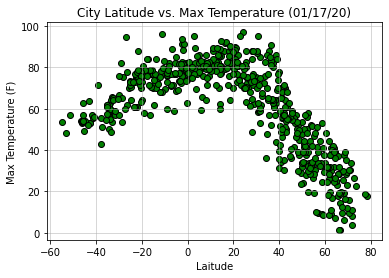

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Cites closer to 0 on the latitude axis temperature tends to be a lot higher and the higher the latitude the temperature starts to drop

## Latitude vs. Humidity Plot

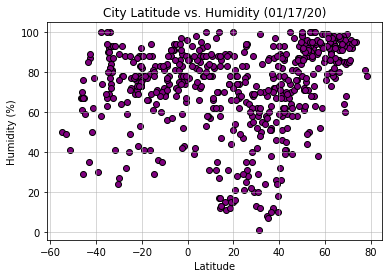

In [26]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "purple", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

Cites throughout any latitude tend to have around the same percent of humidity 

## Latitude vs. Cloudiness Plot

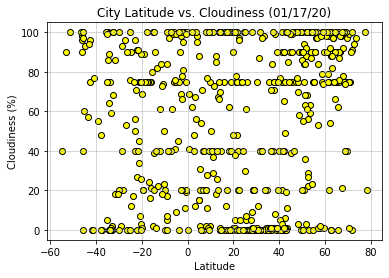

In [27]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "yellow", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

The random cities that were generated is showing that cloudiness can range in all percentages depending on the latitude 

## Latitude vs. Wind Speed Plot

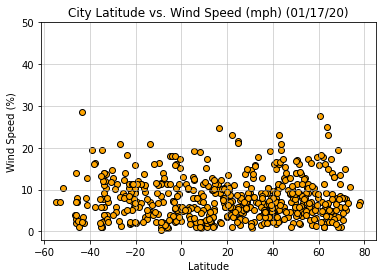

In [28]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "orange", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

Wind speed perentage max is no more than 30 percent based of the latitude of the cities that were pulled

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [17]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


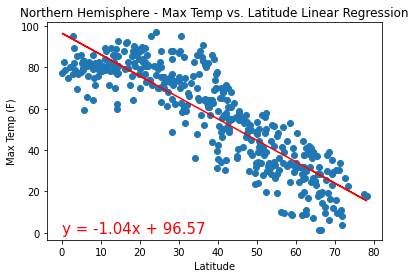

In [18]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Moving across the latitude of the cities that were pulled shows that the higher the latitude the lower the max temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.74


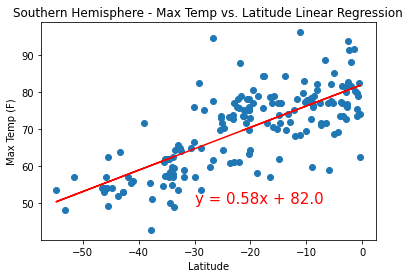

In [19]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

the lower the latitude the higher the max temperature tends to be

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.36


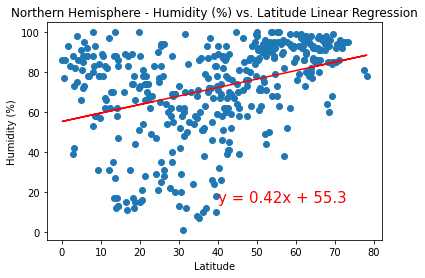

In [20]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The humidity levels across the latitude tend to be very consistent with each point above 0

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.18


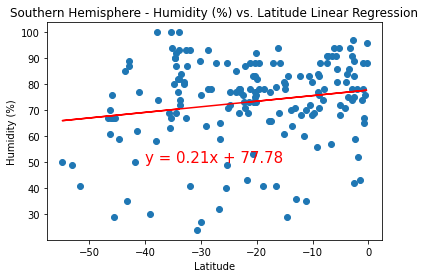

In [21]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and humidity within the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33


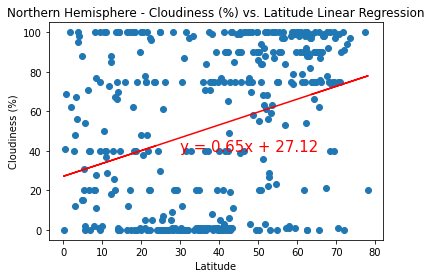

In [22]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The correlation across the northern hemisphere and latitude above 0 has a positive trend

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


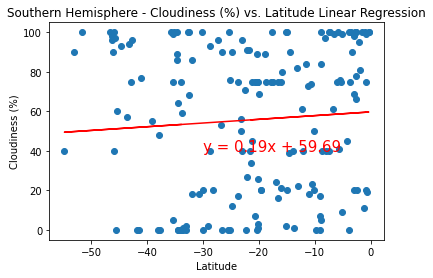

In [23]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The correlation across the southern hemisphere and latitude below 0 has an upward trend

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


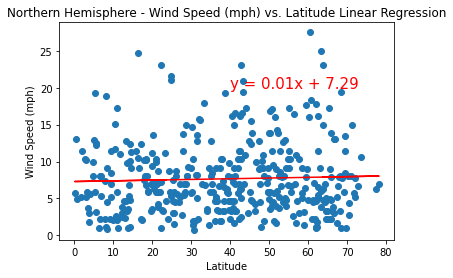

In [24]:

# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The correlation across the northen hemisphere and latitude above 0 is steady and even

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.02


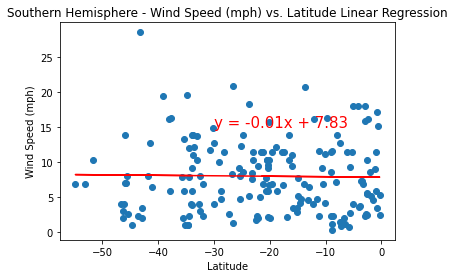

In [25]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The correlation across the southern hemisphere and latitude below 0 is steady and even